# Mbandaka-Gruppe

* [Funde](#Funde)
    * [Befunde](#Befunde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
    * [Matrix mit allen Pos & Verz](#Matrix-mit-allen-Pos-&-Verz)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'MBA'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Formen

In [69]:
sql = """SELECT
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Ort.ort_fluss,
           t_Komplex.bef_nr,
           t_Komplex.bef_art,
           t_Obj.objID,
           t_Obj.Scherbe,
           t_Obj.Anzahl,
           t_Obj.Form_Gef,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [70]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,10,26.315789
GE,28,73.684211


In [71]:
df_pivot = df.pivot_table(values = 'Anzahl', index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

Anzahl    Prozent
ort_fluss     Ort                 bef_nr                   
Likwala-Esobe Bojenjo (Fpl. 292)  87/101       1   2.631579
              Boyenge (Fpl. 284)  87/101       1   2.631579
              Ebambe (Fpl. 297)   87/101       1   2.631579
Sangha        Bobusa (Fpl. 239)   87/1         2   5.263158
              Sosolo (Fpl. 241)   87/101       1   2.631579
Ubangi        Bolumbu (Fpl. 194)  85/101       1   2.631579
              Zamba (Fpl. 191)    85/101       1   2.631579
Zaire/Kongo   Gombe (Fpl. 237)    87/101       1   2.631579
              Lukolela (Fpl. 234) 87/101      12  31.578947
              Maberu (Fpl. 235)   87/101       6  15.789474
              Sungu (Fpl. 236)    87/101      11  28.947368

In [72]:
# nur einzeln aufgenommene GE
df_ge = df.loc[df['Anzahl'] == 1]

df_pivot = df_ge.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], columns='Typ', aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl                           \
Typ                                      BDG/MBA (?)  MBA MBA (?) MBA/NGO (?)   
ort_fluss     Ort                 bef_nr                                        
Likwala-Esobe Bojenjo (Fpl. 292)  87/101         NaN  NaN     NaN         NaN   
              Boyenge (Fpl. 284)  87/101         NaN  NaN     NaN         NaN   
              Ebambe (Fpl. 297)   87/101         1.0  NaN     NaN         NaN   
Sangha        Bobusa (Fpl. 239)   87/1           NaN  2.0     NaN         NaN   
              Sosolo (Fpl. 241)   87/101         NaN  NaN     NaN         1.0   
Ubangi        Bolumbu (Fpl. 194)  85/101         NaN  NaN     1.0         NaN   
              Zamba (Fpl. 191)    85/101         NaN  NaN     1.0         NaN   
Zaire/Kongo   Gombe (Fpl. 237)    87/101         NaN  1.0     NaN         NaN   
              Lukolela (Fpl. 234) 87/101         NaN  5.0     NaN         NaN   
              Maberu (Fpl. 235)   87/101         2.0  3.0     1.0         NaN   
              Sungu (Fpl. 236)    87/101         NaN  3.0     5.0         NaN   

                                                      
Typ                                      NGO/MBA (?)  
ort_fluss     Ort                 bef_nr              
Likwala-Esobe Bojenjo (Fpl. 292)  87/101         1.0  
              Boyenge (Fpl. 284)  87/101         1.0  
              Ebambe (Fpl. 297)   87/101         NaN  
Sangha        Bobusa (Fpl. 239)   87/1           NaN  
              Sosolo (Fpl. 241)   87/101         NaN  
Ubangi        Bolumbu (Fpl. 194)  85/101         NaN  
              Zamba (Fpl. 191)    85/101         NaN  
Zaire/Kongo   Gombe (Fpl. 237)    87/101         NaN  
              Lukolela (Fpl. 234) 87/101         NaN  
              Maberu (Fpl. 235)   87/101         NaN  
              Sungu (Fpl. 236)    87/101         NaN

In [73]:
a = pd.Series({'sicher':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'] == style]),
               'fraglich':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'].str.contains(' ')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,14,50.0
sicher,14,50.0


In [74]:
# nur ausgezählte Stücke
df_a = df.loc[df['Anzahl'] != 1]

In [75]:
df_a.pivot_table(values = 'Anzahl', index = 'Typ', columns = 'Scherbe', aggfunc = np.sum, margins = True)

Scherbe,R,W,All
Typ,,,
MBA (?),7.0,3.0,10.0
All,7.0,3.0,10.0


In [76]:
df_pivot = df_a.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum, fill_value = '')
df_pivot

Anzahl
ort_fluss   Ort                 bef_nr        
Zaire/Kongo Lukolela (Fpl. 234) 87/101       7
            Sungu (Fpl. 236)    87/101       3

### Befunde

In [77]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'bef_art', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
bef_art,,
Oberfl,36,94.736842
Schicht,2,5.263158


Nur die Stücke aus den Gräbern:

In [78]:
df[df['bef_art'] == 'Grube']

,ort_kurz,Ort,ort_fluss,bef_nr,bef_art,objID,Scherbe,Anzahl,Form_Gef,Typ


## Scherbentypen

In [79]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
# df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,NaN,NaN
R,21.0,55.263158
W,17.0,44.736842
B,NaN,NaN


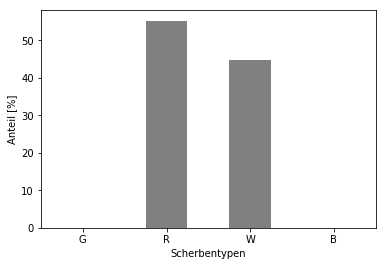

In [80]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Fragmentierung

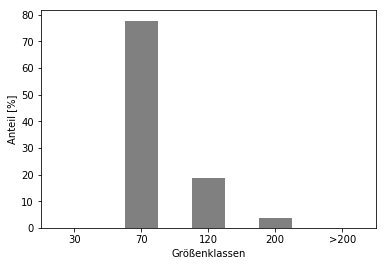

In [81]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)
#display(df.head())

df_pivot = df.pivot_table(values = 'Anzahl', index = 'Gr_Clist', aggfunc = np.sum)
#df_pivot['B'] = 0.
custom_dict = {'30':0, 70:1, 120:3,200:4,'>200':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
#df_pivot

df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anteil [%]')
plt.show()

In [82]:
df_pivot

,Anzahl,Prozent
30,NaN,NaN
70,21.0,77.777778
120,5.0,18.518519
200,1.0,3.703704
>200,NaN,NaN


## Technologische Merkmale (*fabrics*)

In [26]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
len(df)

36

In [21]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


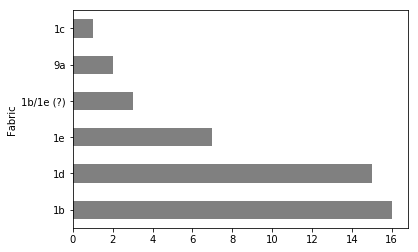

In [22]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [23]:
df1 = df.dropna(subset = ['Fabric'])

a = pd.Series({'1':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("1")]),
               '2':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("2")]),
               '3':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("3")]),
               '4':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("4")]),
               '5':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("5")]),
               '6':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("6")]),
               '7':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("7")]),
               '8':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("8")]),
               '9':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("9")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
1,42,95.454545
2,0,0.000000
3,0,0.000000
4,0,0.000000
5,0,0.000000
6,0,0.000000
7,0,0.000000
8,0,0.000000
9,2,4.545455


In [24]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
1b,16,36.363636
1d,15,34.090909
1e,7,15.909091
1b/1e (?),3,6.818182
9a,2,4.545455


In [7]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,13.0,86.666667
wenig,NaN,NaN
mittel,NaN,NaN
viel,1.0,6.666667
sehr viel,1.0,6.666667


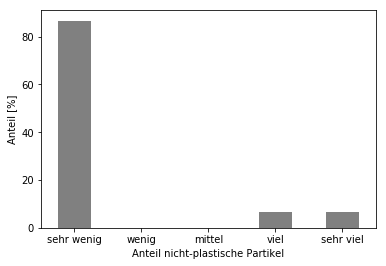

In [8]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [9]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,12.0,80.000000
F,NaN,NaN
M,1.0,6.666667
C,NaN,NaN
VC,2.0,13.333333


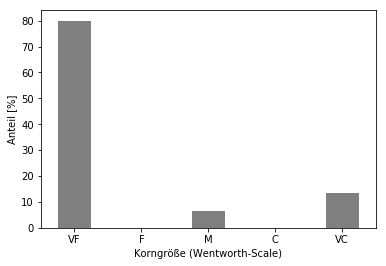

In [10]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [11]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,12,80.000000
Schamott,2,13.333333
,1,6.666667


## Brennfarbe

In [12]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,1,2.702703
Sonstig,20,54.054054
Weiß,16,43.243243


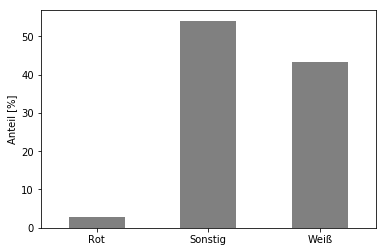

In [13]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [14]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

       59
       17
s       2
bg      2
 s      1
bg      1
dtype: int64

### Gefäßformen

In [15]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [96]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,10,38.461538
sicher,16,61.538462


In [97]:
a[0].sum()

26

In [98]:
# alles fragliche einfach abschneiden und nur 1. Variante behalten:
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df['Form_Gef'] = df['Form_Gef'].apply(lambda x: x.split('/')[0])

In [99]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

In [100]:
# mit .isin nur noch solche Einträge auswählen, die sicher 'Pikunda-Munda' sind (ohne ? oder anderen Kram)
dfFilter = [style]
df = df[df['Typ'].isin(dfFilter)]
# display(df1.head())
# display(df1.head())

In [101]:
df_pivot

,objID
Form_Gef,
B1,1
B4,1
C1,1
C2,1
D1,1
D2,21


In [102]:
df_pivot['objID'].sum()

26

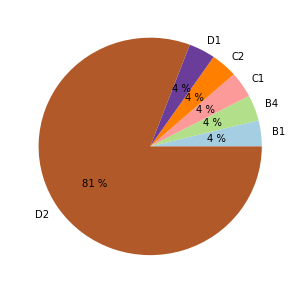

In [103]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
#plt.savefig('../output/figs/3-1-2-12_Epena_GefForm2.pdf', bbox_inches='tight')

### Proportionen

In [35]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# display(df.head())

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
#df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['minD']

#a = df.loc[df['Form_Gef'].str.contains("C2")]
df = df.loc[df['Form_Gef'].str.contains("D1|D2")]

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

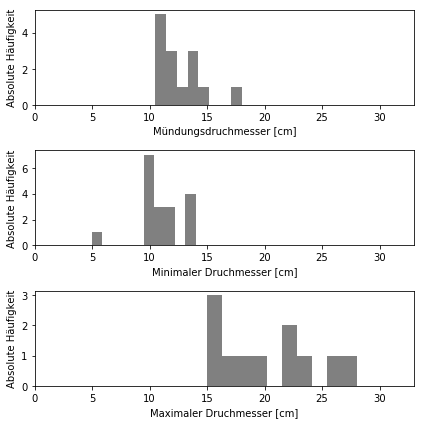

In [36]:
mi = min(round(df['minD'])) - 5
ma = round(max(df['maxD'])) + 5

fig = plt.figure(1)
fig.set_size_inches(6,6)

ax = plt.subplot(311)
#bins = round(max(round(a['muendungsD'])) - min(round(a['muendungsD'])))
bins = 10
ax = df['muendungsD'].hist(histtype='stepfilled', bins = 8, fc = 'grey')
plt.xlabel("Mündungsdruchmesser [cm]")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)
#plt.show()

ax = plt.subplot(312)
#bins = round(max(a['minD']) - min(a['minD']))
bins = 10
ax = df['minD'].hist(histtype='stepfilled', bins = bins, fc = 'grey')
plt.xlabel("Minimaler Druchmesser [cm]")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)
#plt.show()

ax = plt.subplot(313)
#bins = round(max(a['maxD']) - min(a['maxD']))
bins = 10
ax = df['maxD'].hist(histtype='stepfilled', bins = bins, fc = 'grey')
plt.xlabel("Maximaler Druchmesser [cm]")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.tight_layout()
#plt.savefig('../output/figs/3-1-2-7_MDB_Proportionen_D1-Gef.pdf', bbox_inches='tight')
plt.show()

In [37]:
df.describe()

,muendungsD,minD,maxD,muend-min,max-min
count,14.000000,18.000000,11.000000,14.000000,11.000000
mean,12.500000,11.083333,20.272727,1.100558,1.749585
std,2.192645,2.157409,4.406607,0.069268,0.303708
min,10.500000,5.000000,15.000000,1.037037,1.454545
25%,10.500000,10.000000,16.500000,1.050000,1.541667
50%,12.000000,11.000000,19.000000,1.081169,1.629630
75%,13.500000,12.000000,23.000000,1.125000,1.857143
max,18.000000,14.000000,28.000000,1.285714,2.363636


## Mündungs- und Randformen

In [107]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

# Zeilen ohne Mdg löschen
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Mdg'])
df1['Form_Mdg'] = df1['Form_Mdg'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Mdg'] = df1['Form_Mdg'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot.head()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M2,12,85.714286
M1,1,7.142857
M3,1,7.142857


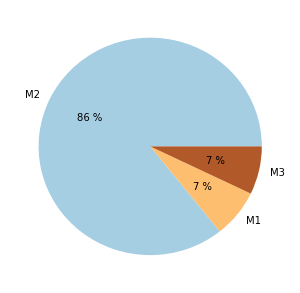

In [108]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [109]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1.1,6,37.50
B2.1,6,37.50
A2.1,1,6.25
B1,1,6.25
B2,1,6.25


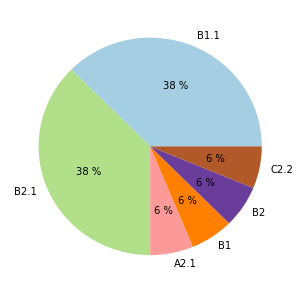

In [110]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


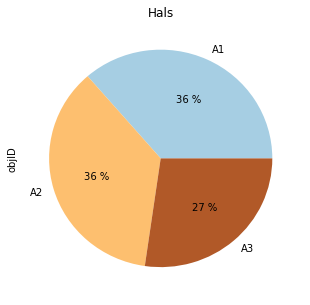

In [111]:
a = df.dropna(subset = ['Form_Hals'])
a['Form_Hals'] = a['Form_Hals'].map(lambda x: str(x)[:2])

df_pivot = a.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


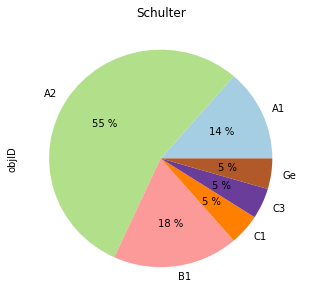

In [112]:
b = df.dropna(subset = ['Form_Schulter'])
b['Form_Schulter'] = b['Form_Schulter'].map(lambda x: str(x)[:2])

df_pivot = b.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

## Boden

In [113]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden,Anzahl


In [114]:
len(df['Form_Boden'])

0

## Verzierungen

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


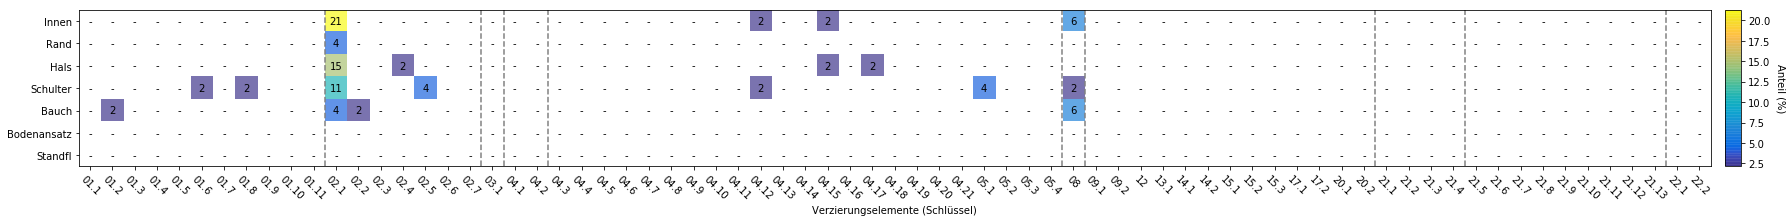

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-2-1-3_Mbandaka_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [38]:
sql = """SELECT
            t_Obj.objID,
            t_Obj.Anzahl,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
            [t_Obj].[Verz_PosUnbekannt] || '/' || [t_Obj].[Verz_Innen_Rand/Hals/berteil] || '/' || [t_Obj].[Ver_Rand] || '/' || [t_Obj].[Verz_Oberteil] || '/' || [t_Obj].[Verz_Hals] || '/' || [t_Obj].[Verz_Schulter] || '/' || [t_Obj].[Verz_Bauch] || '/' || [t_Obj].[Verz_Unterteil] || '/' || [t_Obj].[Verz_Bodenansatz] || '/' || [t_Obj].[Ver_Standfl] AS ObjVerz
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            LEFT JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            LEFT JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            LEFT JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['pos'].fillna('unverz', inplace=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'objID', columns = 'pos', aggfunc = len)

a = pd.Series({'unverziert':len(df_pivot.loc[df_pivot['unverz'] == 1]),
               'verziert':len(df_pivot.loc[df_pivot['unverz'] != 1])})
a = pd.DataFrame(a)
a = a.rename(columns={0:'Anzahl'})
a['Prozent'] = a['Anzahl']/a['Anzahl'].sum()*100
a

,Anzahl,Prozent
unverziert,5,13.888889
verziert,31,86.111111


In [117]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
#display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


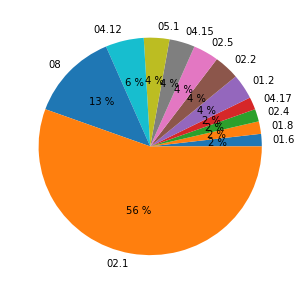

In [118]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%')
plt.ylabel('')

In [119]:
a = pd.Series({'Eindrücke (einzeln)':len(df.loc[df['verzName'].str.contains("04.")].index),
               'Sonstiges':len(df.loc[~df['verzName'].str.contains("04.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Eindrücke (einzeln),6,11.111111
Sonstiges,48,88.888889


In [120]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
pos,,
1 Innen,15,27.777778
2 Rand,2,3.703704
3 Hals,10,18.518519
4 Schulter,19,35.185185
5 Bauch,8,14.814815


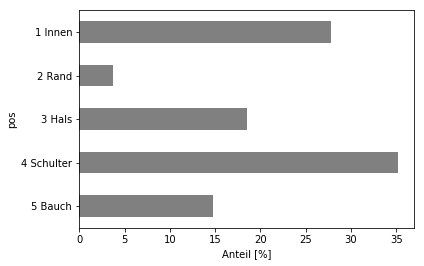

In [121]:
df_pivot = df_pivot.sort_index(ascending=False)

df_pivot.plot(y = 'Prozent', kind = 'barh', legend = None, color = 'grey')
plt.xlabel('Anteil [%]')
plt.show()

## Verbreitung

In [122]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
10,Zamba (Fpl. 191),191,17.884584,0.271798,MBA (?)
2,Bolumbu (Fpl. 194),194,17.882294,0.677829,MBA (?)
2,Lukolela (Fpl. 234),234,17.175593,-1.062185,MBA
3,Maberu (Fpl. 235),235,17.257014,-1.069018,MBA
4,Sungu (Fpl. 236),236,17.334786,-1.033313,MBA
1,Gombe (Fpl. 237),237,17.580406,-0.704069,MBA
0,Bobusa (Fpl. 239),239,16.917098,-1.052349,MBA
8,Sosolo (Fpl. 241),241,17.128605,-0.892241,MBA (?)
3,Boyenge (Fpl. 284),284,17.199855,-0.835253,MBA (?)
1,Bojenjo (Fpl. 292),292,17.432057,-0.006791,MBA (?)


In [123]:
df.to_csv("../data/processed/3-2-1-3_MBA_Verbreitung.csv", index = False)

In [124]:
len(df)

11

## Tafeln

In [125]:
# damit alle Zeilen angezeigt werden:
pd.set_option('display.max_rows', None)

In [126]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,3,7,ZAM,85/101,NaN,14,MBA (?),C2 (?),None,None
1,4,6,BLU,85/101,NaN,25,MBA (?),B1 (?),None,None
2,28,4,MBR,87/101,NaN,131,MBA,D2,B1/B2,None
3,28,10,MBR,87/101,NaN,16,MBA,D2,B1.1/B2.1,None
4,28,12,MBR,87/101,NaN,109,MBA (?),D2 (?),B2.1 (?),None
5,30,3,MBR,87/101,NaN,95,MBA,B4 (?),None,None
6,31,8,MBR,87/101,NaN,116,BDG/MBA (?),None,None,None
7,31,11,MBR,87/101,NaN,52,BDG/MBA (?),None,None,None
8,32,4,SUN,87/101,NaN,7,MBA,D2,B1.1,None
9,32,5,SUN,87/101,NaN,11,MBA (?),D2,B2,None


In [127]:
len(df)

30